# Airbnb Data Analysis

Airbnb is an American company that operates an online marketplace for lodging, primarily homestays for vacation rental and tourism activities. Airbnb stakeholders wanted to know what happened to the business in New York City from 2011 until 2023 and asked if any neighborhood needed development.

## Dataset 

The dataset is downloaded from kaggle and has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values, it consists of the following attributes:

ID: Airbnb’s unique identifier for the listing.

Name: Name of the listing.

Host_id: Airbnb’s unique identifier for the host or user.

Host_name: Name of the host. Usually just the first name(s).

Neighbourhood_group: The neighborhood group is geocoded using the latitude and longitude against neighborhoods defined by open or public.

Neighbourhood: Same as neighbourhood_group.

Latitude: Latitude coordinates.

Longitude: Longitude coordinates.

Room_type: All homes are grouped into the following four room types.

Price: The price of all homes in USD.

Minimum_nights: The minimum number of nights required by an Airbnb host to book a stay.

Number_of_reviews: The total number of reviews received by an Airbnb room.

Last_review: The date the rooms last received a review.

Reviews_per_month: The average number of reviews a room receives each month.

Calculated_host_listings_count: The total number of rooms owned or listed by the same host.

Availability_365: The number of days in a year that the room is available for rent.

### Importing basic libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score
#Oversamplying
#from imblearn.over_sampling import RandomOverSampler

#feature engineering
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [95]:
df=pd.read_csv(r"C:\Users\Soundarya A I\Documents\PGDA\Power BI\Projects\AirBNB_NYC_2019.csv\AB_NYC_2019.csv")

In [96]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [97]:
df.shape

(48895, 16)

In [98]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Checking for summary statistics

In [100]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [101]:
percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)
print(f'the percentage of data having availibity as 0 is {percentage_of_data_having_availbility_0}')

the percentage of data having availibity as 0 is 35.86


## lets check out the last_review wise count of where availability_365 is 0

In [102]:
df[df['availability_365']==0].groupby(['last_review']).size().sort_values(ascending=False).head(15)


last_review
2019-01-01    194
2018-01-01    142
2019-01-02    129
2019-06-23     90
2018-01-02     86
2017-01-01     85
2019-05-27     75
2017-01-02     73
2016-01-02     67
2019-07-01     63
2016-01-03     61
2018-12-30     61
2019-01-03     60
2019-06-24     59
2018-12-31     57
dtype: int64

In [103]:
df.loc[ (df.room_type=='Entire home/apt') & (df.price==0),'price']=df.loc[ (df.room_type=='Entire home/apt') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Private room') & (df.price==0),'price']=df.loc[ (df.room_type=='Private room') & (df.price!=0),'price'].median()
df.loc[ (df.room_type=='Shared room') & (df.price==0),'price']=df.loc[ (df.room_type=='Shared room') & (df.price!=0),'price'].median()

In [104]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.739094,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.146276,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Summary statistics interpretation

### Pricing
- The prices vary significantly, ranging from 0 to 10,000.
- The average price is around 152.72, with a standard deviation of 240.15, indicating a high variability in listing prices.
- The 50th percentile (median) price is 106.

### Host listing count
- The calculated_host_listings_count shows the number of listings managed by each host, ranging from 1 to 327 listings.
- The median number of listings per host is 1, with an average of approximately 7.14 listings.

### Availability
- The availability of properties (availability_365) ranges from 0 to 365 days per year.
- The mean availability is 112.78 days, with a median of 45 days, indicating that many properties are not available year-round.


## Checking for null values

In [105]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling.

In [106]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)
df.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


 For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month.

In [107]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [108]:
df.dropna(subset=['name'],inplace=True)

In [109]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Checking for duplicates

In [110]:
df[df.duplicated]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


No duplicates found

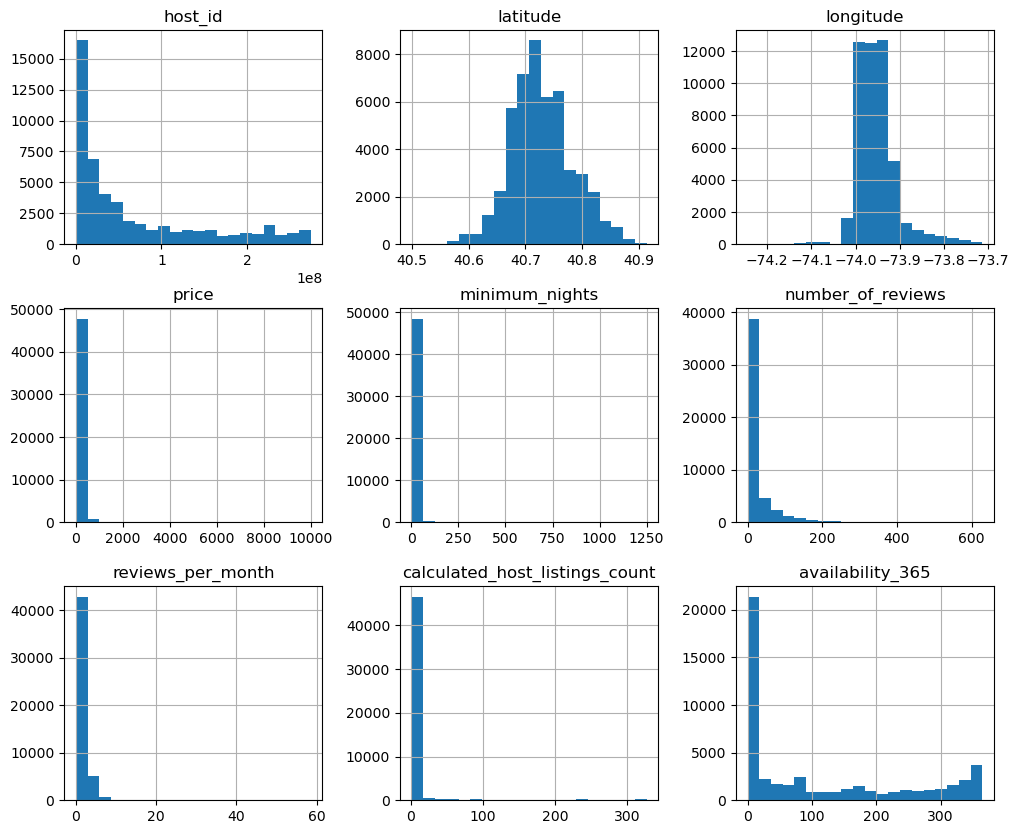

In [111]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

In [112]:
minimum_threshold=df.price.quantile(0.010)
minimum_threshold

30.0

In [113]:
maximum_threshold=df.price.quantile(0.990)
maximum_threshold

799.0

In [17]:
airbnb=df[(df['price']<maximum_threshold) & (df['price']>minimum_threshold)]
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Exploratory Data Analysis

In [18]:
airbnb.head(2)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [114]:
airbnb.price.describe()

count    47391.000000
mean       138.052647
std        102.331359
min         31.000000
25%         70.000000
50%        105.000000
75%        175.000000
max        795.000000
Name: price, dtype: float64

(array([23829., 12921.,  6192.,  2034.,  1206.,   383.,   401.,   162.,
          179.,    84.]),
 array([ 31. , 107.4, 183.8, 260.2, 336.6, 413. , 489.4, 565.8, 642.2,
        718.6, 795. ]),
 <BarContainer object of 10 artists>)

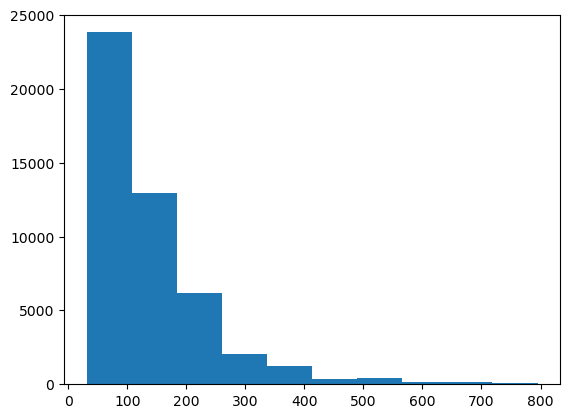

In [115]:
plt.hist(airbnb.price)

### Number of airbnb in different Neighbourhood_group

In [117]:
airbnb['neighbourhood_group'].nunique()

5

In [118]:
airbnb.groupby("neighbourhood_group").count()

,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,
Bronx,1020,1020,1020,1020,1020
Brooklyn,19651,19651,19651,19651,19651
Manhattan,20877,20877,20877,20877,20877
Queens,5490,5490,5490,5490,5490
Staten Island,353,353,353,353,353


In [119]:
grouped_counts = airbnb.groupby("neighbourhood_group").size().reset_index(name='count')
print(grouped_counts)

  neighbourhood_group  count
0               Bronx   1020
1            Brooklyn  19651
2           Manhattan  20877
3              Queens   5490
4       Staten Island    353


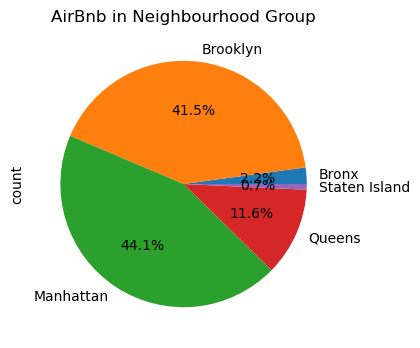

In [120]:
grouped_counts.index = grouped_counts['neighbourhood_group']
plotPie = grouped_counts.plot.pie(y='count', autopct='%1.1f%%', legend = False, title='AirBnb in Neighbourhood Group', figsize=(9,4))

From above pie chart i can visualize that Manhattan has more airbnb of 44.3% followed by Brooklyn of 41.1%

<Axes: xlabel='neighbourhood_group', ylabel='count'>

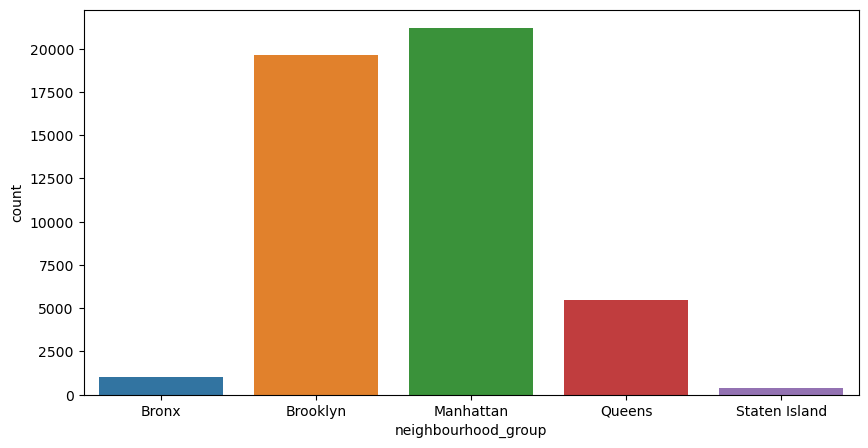

In [26]:
import matplotlib.pyplot as plotHist
%matplotlib inline

#Histogram of different neighbourhood_group by count
plotHist.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="count", data=grouped_counts)

### Average price of AirBnb in different neighbourhood_group 

In [27]:
neighbourhood_group_avgPrice = airbnb.groupby("neighbourhood_group")["price"].mean().reset_index(name="avg_price")
print(neighbourhood_group_avgPrice.head())

  neighbourhood_group   avg_price
0               Bronx   87.534314
1            Brooklyn  117.446977
2           Manhattan  172.878836
3              Queens   96.034232
4       Staten Island   97.311615


<Axes: xlabel='neighbourhood_group', ylabel='avg_price'>

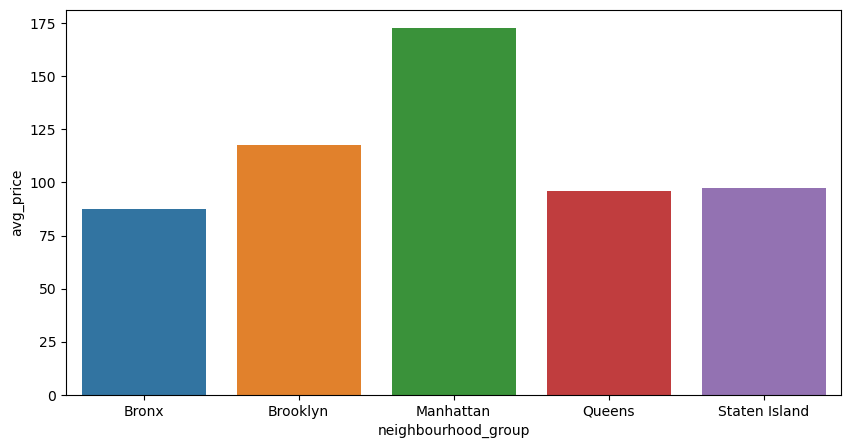

In [28]:
plotHist.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="avg_price", data=neighbourhood_group_avgPrice)

#### For better visualization

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

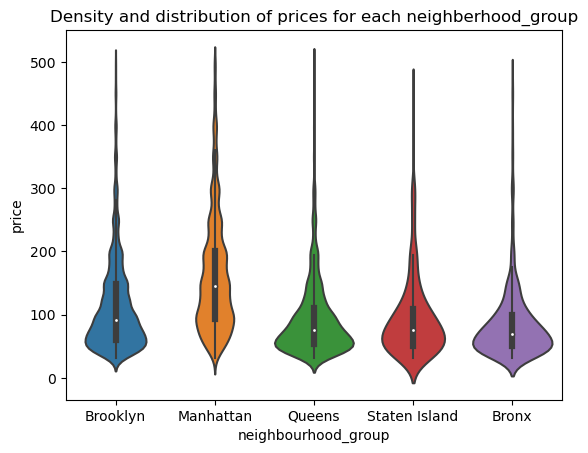

In [29]:
#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with 150 price as average observation, followed by Brooklyn with 90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

### Different room type

In [30]:
room_type_count = airbnb.groupby("room_type").size().reset_index(name='count')
print(room_type_count)

         room_type  count
0  Entire home/apt  24979
1     Private room  21848
2      Shared room    901


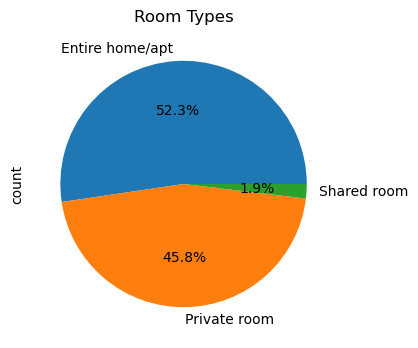

In [122]:
#Pie chart of different room_type
room_type_count.index = room_type_count['room_type']
plotPie = room_type_count.plot.pie(y='count', autopct='%1.1f%%', legend = False, title='Room Types', figsize=(8,4))

- Entire home/apt is the most popular type of listing, with the highest count.
- Private room is also quite popular but has fewer listings than entire homes/apartments.
- Shared room has the fewest listings, indicating that fewer guests opt for this type of accommodation.

In [32]:
#Average price of AirBnb based on room_type 
room_type_avgPrice = airbnb.groupby('room_type')['price'].mean().reset_index(name='avg_price')
print(room_type_avgPrice)

         room_type   avg_price
0  Entire home/apt  188.991393
1     Private room   84.124863
2      Shared room   74.673696


<Axes: xlabel='room_type', ylabel='avg_price'>

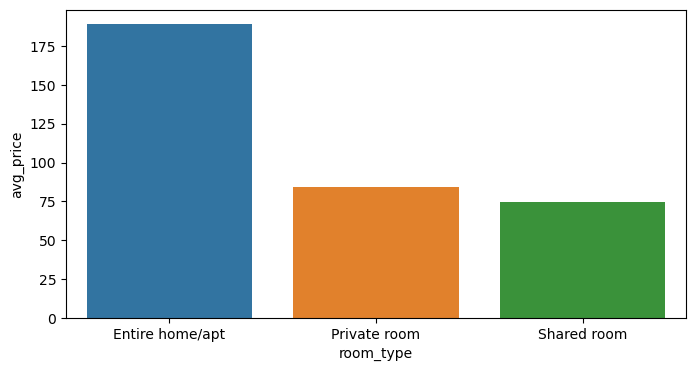

In [125]:
plotHist.figure(figsize=(8, 4))
sns.barplot(x="room_type", y="avg_price", data=room_type_avgPrice)

In [34]:
neighGrp_roomtype = airbnb.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

# Sort by 'neighbourhood_group'
neighGrp_roomtype = neighGrp_roomtype.sort_values(by='neighbourhood_group', ascending=True)

# Display the result
print(neighGrp_roomtype)

   neighbourhood_group        room_type  count
0                Bronx  Entire home/apt    377
1                Bronx     Private room    610
2                Bronx      Shared room     33
3             Brooklyn  Entire home/apt   9469
4             Brooklyn     Private room   9904
5             Brooklyn      Shared room    279
6            Manhattan  Entire home/apt  12881
7            Manhattan     Private room   7872
8            Manhattan      Shared room    458
9               Queens  Entire home/apt   2080
10              Queens     Private room   3285
11              Queens      Shared room    127
12       Staten Island  Entire home/apt    172
13       Staten Island     Private room    177
14       Staten Island      Shared room      4


<Axes: xlabel='neighbourhood_group'>

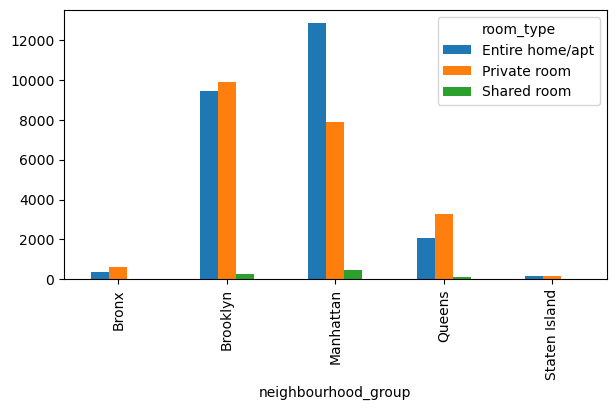

In [130]:
#Different Room type in different neighbourhood_group

pd.pivot_table(neighGrp_roomtype, index='neighbourhood_group', columns='room_type', values='count').plot.bar(figsize=(7,3.5))

In [36]:
neighGrp_roomtype_avgprice = airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean().reset_index(name='avg_price')

# Sort by 'neighbourhood_group'
neighGrp_roomtype_avgprice = neighGrp_roomtype_avgprice.sort_values(by='neighbourhood_group', ascending=True)
print(neighGrp_roomtype_avgprice)

   neighbourhood_group        room_type   avg_price
0                Bronx  Entire home/apt  125.456233
1                Bronx     Private room   65.518033
2                Bronx      Shared room   61.272727
3             Brooklyn  Entire home/apt  165.571021
4             Brooklyn     Private room   72.984552
5             Brooklyn      Shared room   62.498208
6            Manhattan  Entire home/apt  216.554460
7            Manhattan     Private room  106.438897
8            Manhattan      Shared room   86.480349
9               Queens  Entire home/apt  141.222115
10              Queens     Private room   68.754642
11              Queens      Shared room   61.566929
12       Staten Island  Entire home/apt  131.087209
13       Staten Island     Private room   64.457627
14       Staten Island      Shared room   98.750000


In [37]:
#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

neighbourhood
Williamsburg          3893
Bedford-Stuyvesant    3622
Harlem                2623
Bushwick              2393
Hell's Kitchen        1931
Upper West Side       1923
East Village          1831
Upper East Side       1770
Crown Heights         1526
Midtown               1492
Name: count, dtype: int64

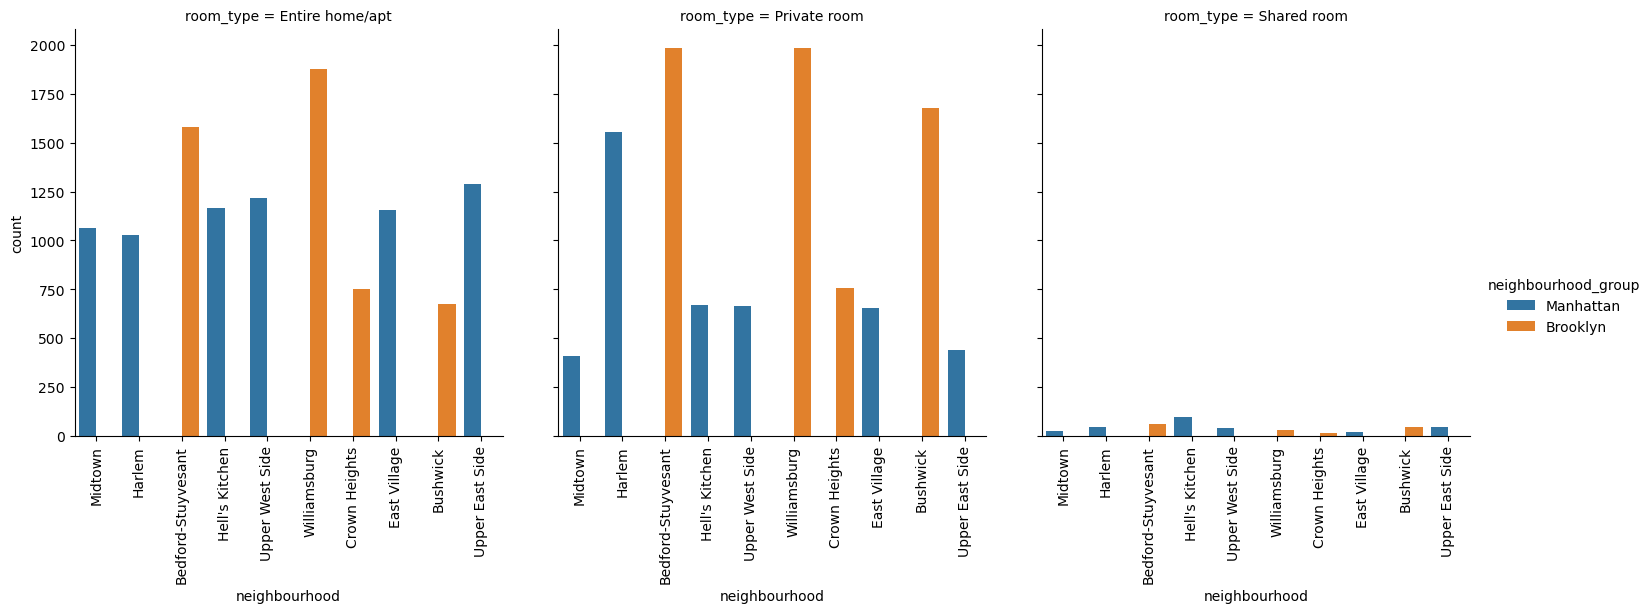

In [38]:
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

let' breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

### Minimum nights guest stay at an AirBnb

In [39]:
min_night_count = airbnb.groupby("minimum_nights").size().reset_index(name='count')
# Sort by 'count' in descending order and get the top 15
min_night_count = min_night_count.sort_values(by='count', ascending=False).head(15)
print(min_night_count)

    minimum_nights  count
0                1  12287
1                2  11521
2                3   7848
29              30   3668
3                4   3236
4                5   2976
6                7   2005
5                6    741
13              14    547
9               10    461
28              29    336
14              15    265
19              20    217
27              28    201
30              31    196


<Axes: xlabel='minimum_nights', ylabel='count'>

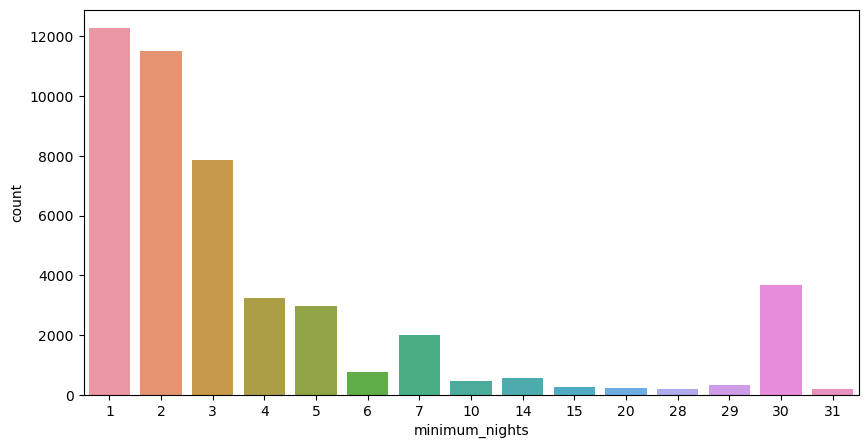

In [40]:
#Minimum nights count
plotHist.figure(figsize=(10, 5))
sns.barplot(x="minimum_nights", y="count", data=min_night_count)

### Average reviews of AirBnb in different neighbourhood_group 

In [41]:
neighbourhoodGroup_numRev = airbnb.groupby("neighbourhood_group")['number_of_reviews'] \
    .mean() \
    .reset_index(name='num_of_reviews')

# Sort by 'num_of_reviews' in descending order and get the top 15
neighbourhoodGroup_numRev = neighbourhoodGroup_numRev.sort_values(by='num_of_reviews', ascending=False).head(15)
print(neighbourhoodGroup_numRev)

  neighbourhood_group  num_of_reviews
4       Staten Island       31.858357
3              Queens       28.048798
0               Bronx       26.580392
1            Brooklyn       24.441787
2           Manhattan       21.224553


<Axes: xlabel='neighbourhood_group', ylabel='num_of_reviews'>

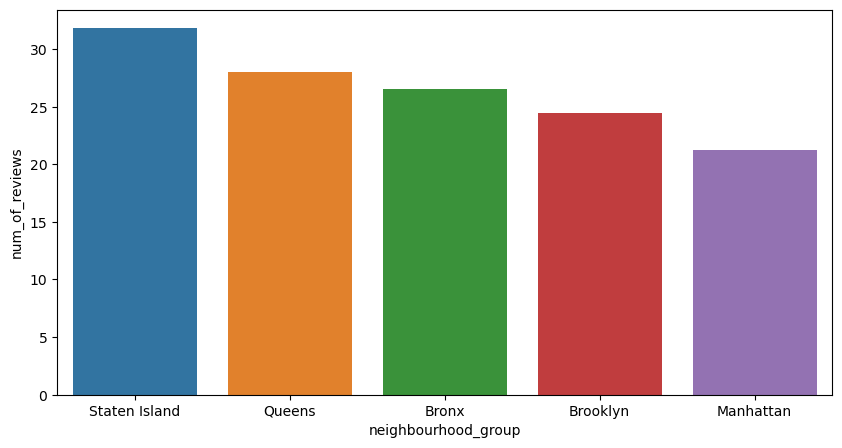

In [42]:
plotHist.figure(figsize=(10, 5))
sns.barplot(x="neighbourhood_group", y="num_of_reviews", data=neighbourhoodGroup_numRev)

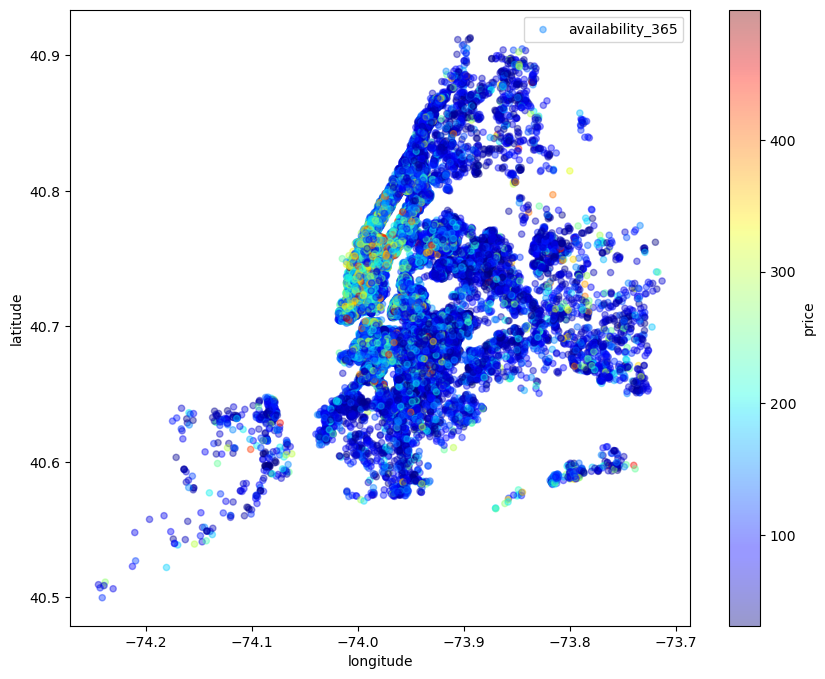

In [43]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

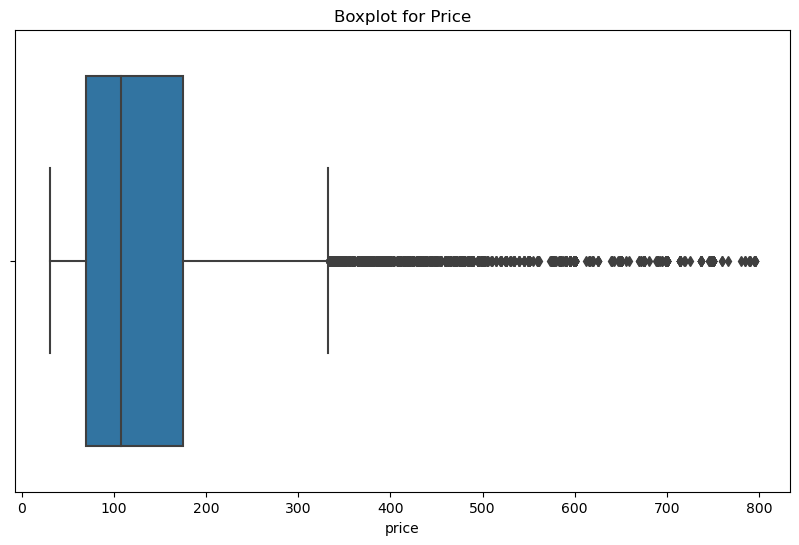

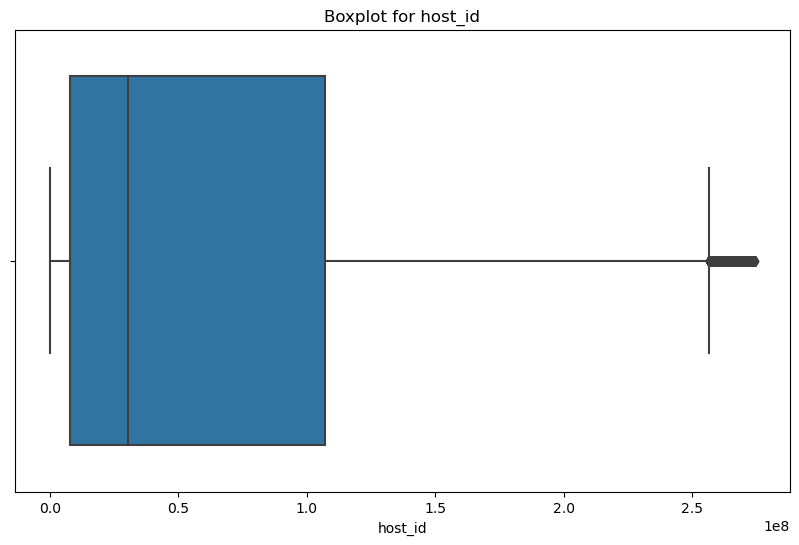

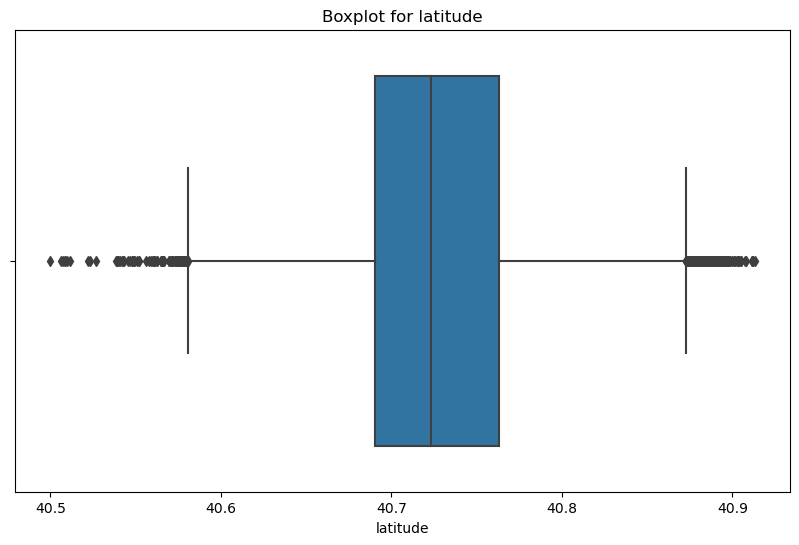

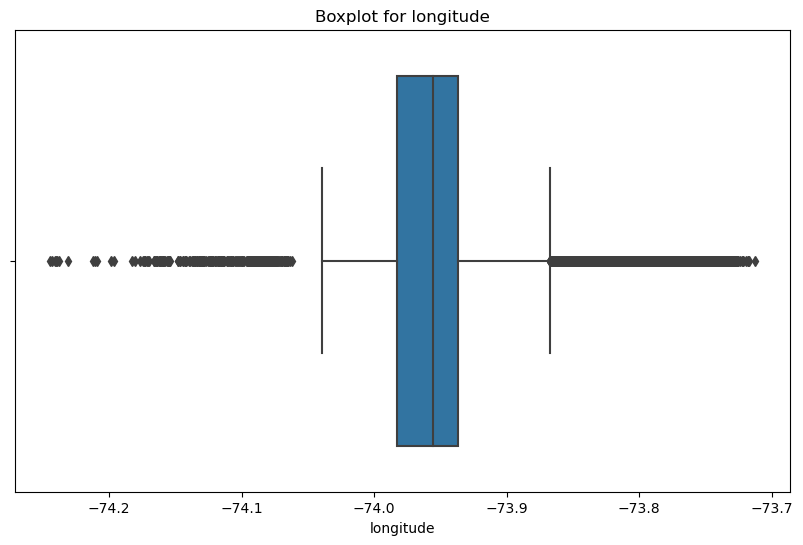

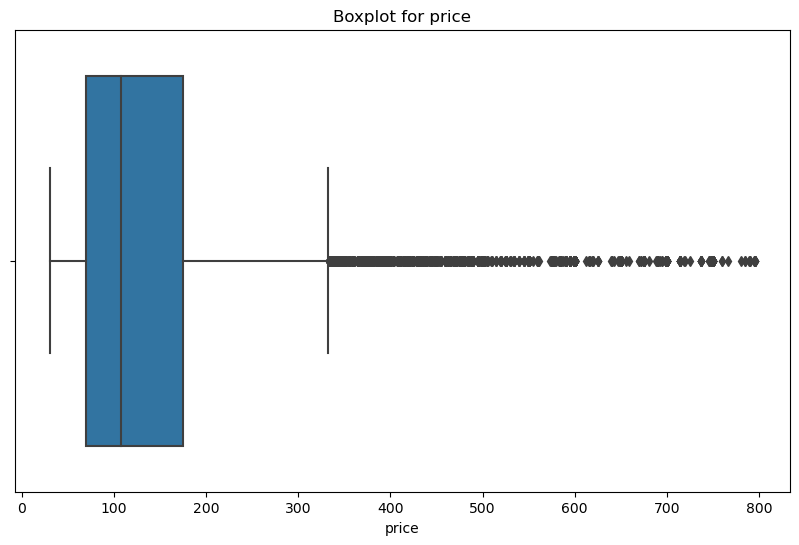

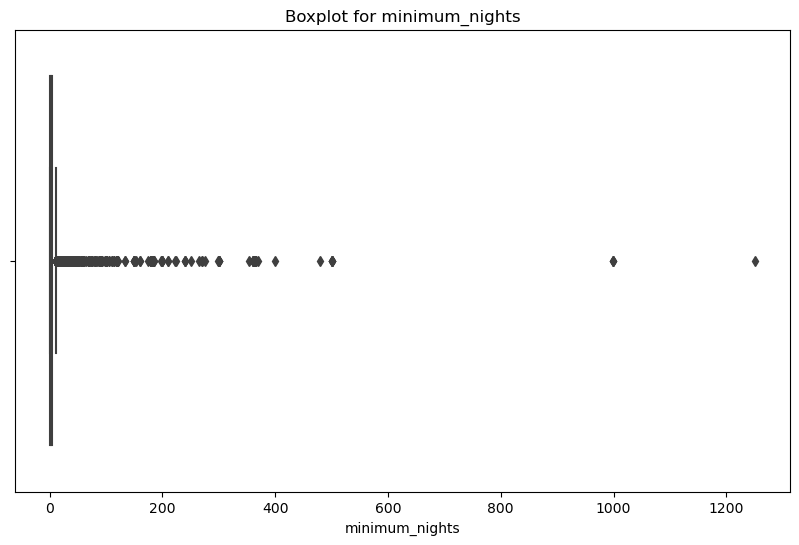

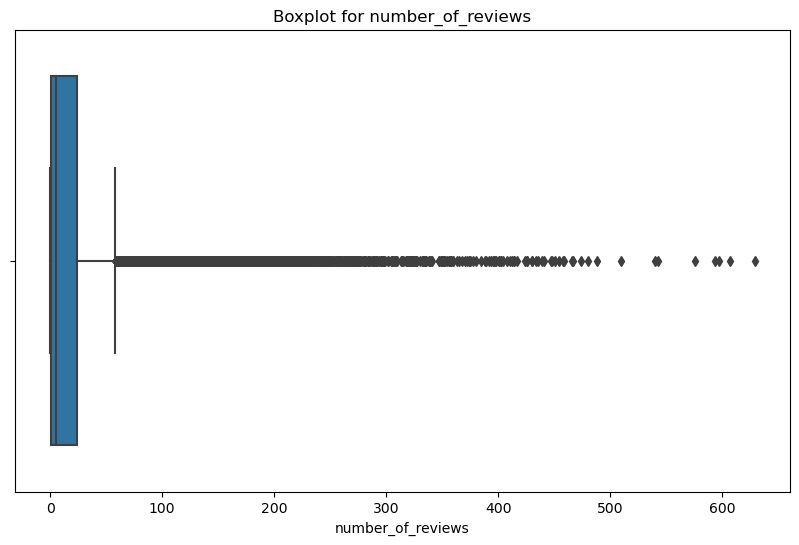

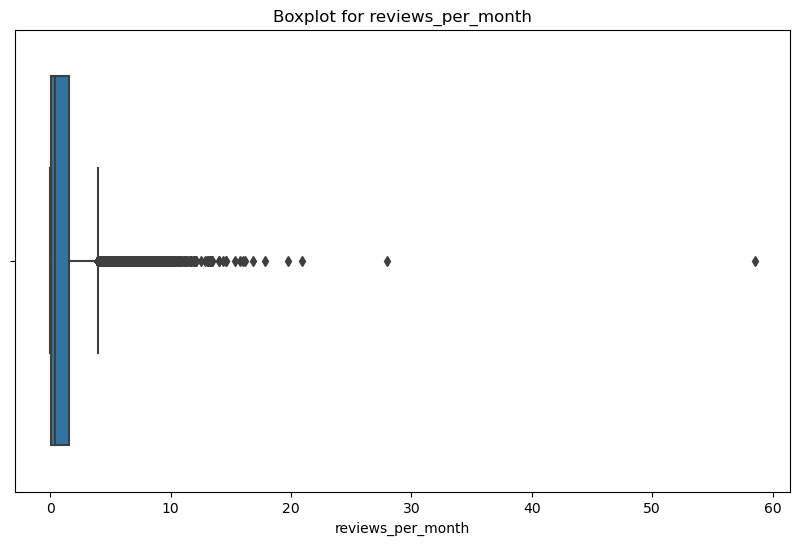

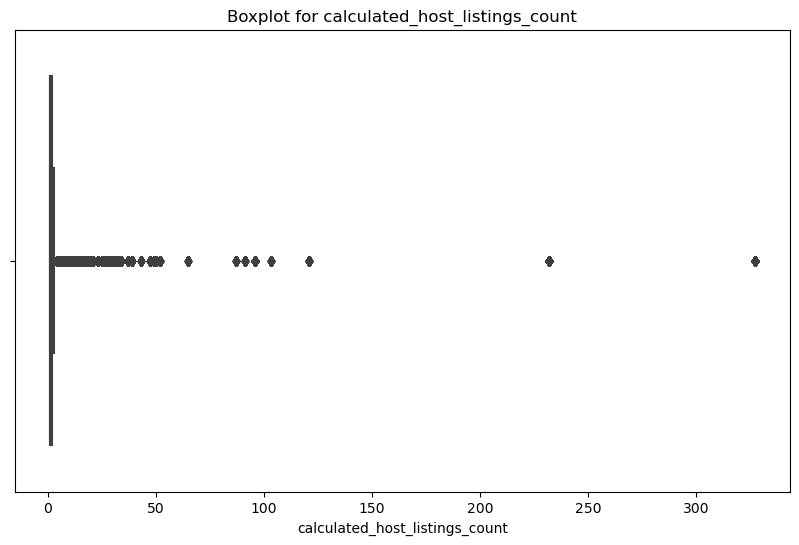

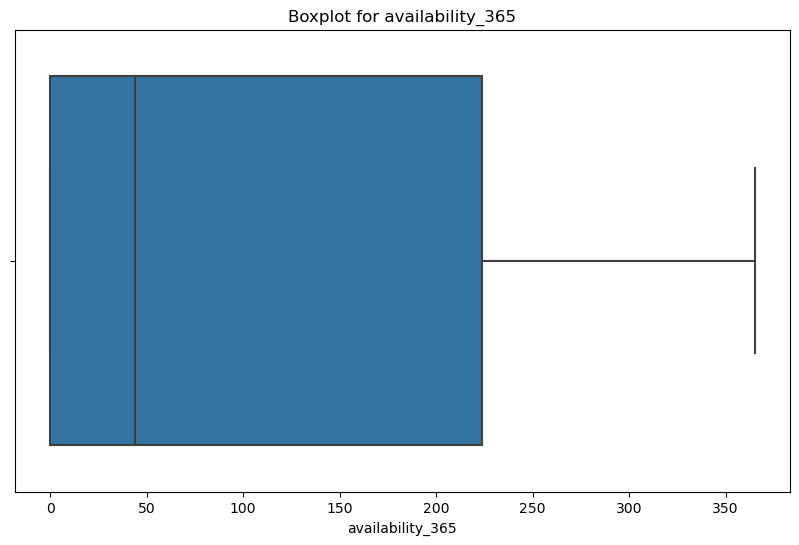

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting boxplot for 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=airbnb['price'])
plt.title('Boxplot for Price')
plt.show()

# Plotting boxplots for other numerical features
numerical_features = numeric_df

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=airbnb[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [48]:
airbnb[airbnb.minimum_nights>800]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5767,Prime W. Village location 1 bdrm,17550546,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365
13404,Historic Designer 2 Bed. Apartment,2697686,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42
26341,Beautiful place in Brooklyn! #2,151084261,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,1.12,6,249
38664,Shared Studio (females only),200401254,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0.00,1,365


In [49]:
airbnb.drop(airbnb[airbnb['minimum_nights']>800].index,axis=0,inplace=True)

In [50]:
airbnb[airbnb.number_of_reviews>550]

airbnb.drop(airbnb[airbnb['number_of_reviews']>550].index,axis=0,inplace=True)

In [52]:
airbnb[airbnb.reviews_per_month>40]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
42075,Enjoy great views of the City in our Deluxe Room!,244361589,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,58.5,9,299


In [53]:
airbnb.drop(airbnb[airbnb['reviews_per_month']>40].index,axis=0,inplace=True)

In [56]:
airbnb[airbnb.calculated_host_listings_count>250]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339
47692,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342
47693,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347
47814,Sonder | 116 John | Polished Studio + Gym,219517861,Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327


In [57]:
airbnb.drop(airbnb[airbnb['calculated_host_listings_count']>250].index,axis=0,inplace=True)

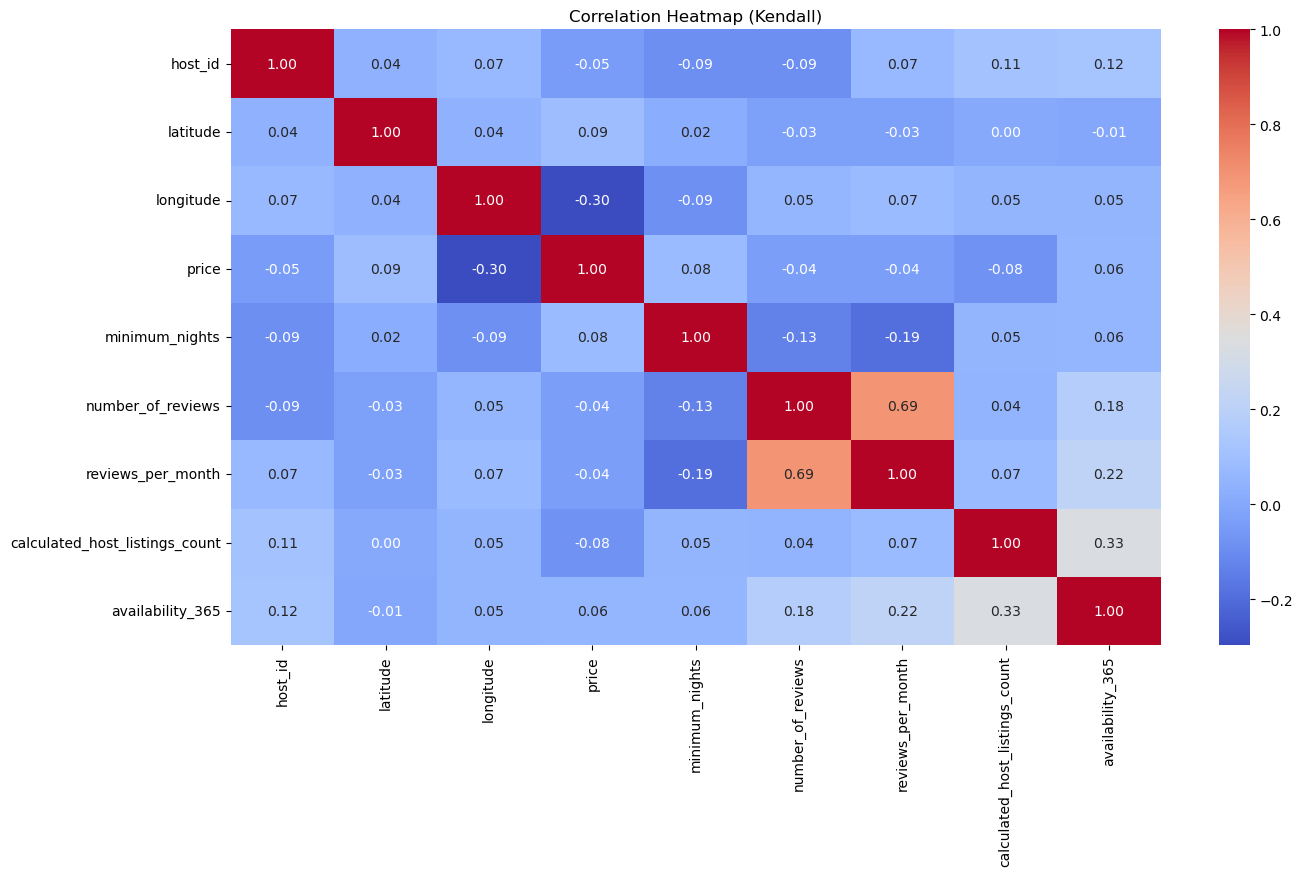

In [45]:
# Filter only numeric columns
numeric_df = airbnb.select_dtypes(include=['number'])

# Compute the correlation matrix using Kendall's tau
corr = numeric_df.corr(method='kendall')

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Kendall)')
plt.show()


In [58]:
# droping the name because its not a good predictor
airbnb.drop('name',axis=1,inplace=True)

In [59]:
airbnb.head(2)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


In [60]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [61]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [62]:
airbnb_en.head(15)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0
5,1,1,200,3,1,129
6,0,0,60,45,1,0
7,1,0,79,2,1,220
8,1,0,79,2,1,0
9,1,1,150,1,4,188


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

## Dividing independent variables and dependent variables

In [64]:
#Defining the independent variables and dependent variables
X = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']

In [65]:
X.head(2)

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,1,6,365
1,1,1,1,2,355


In [66]:
y.head(2)

0    149
1    225
Name: price, dtype: int64

## Train Test split

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test,=train_test_split(X,y,test_size=0.20,random_state=0)

In [68]:
# standardising the data
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [69]:
# dimension of the datasets
print('X_train =',X_train.shape)
print('X_test =',X_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

X_train = (37912, 5)
X_test = (9479, 5)
y_train = (37912,)
y_test = (9479,)


In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
lr=LinearRegression()
lr.fit(X_train,y_train)
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)

#Now will check the MSE of the model
train_mse=mean_squared_error(y_train,train_pred)
test_mse=mean_squared_error(y_test,test_pred)
print('train_mse =',train_mse)
print('test_mse =',test_mse)

# Now will check the r2_score
train_r2_score=r2_score(y_train,train_pred)
test_r2_score=r2_score(y_test,test_pred)
print('train_r2_score =',train_r2_score)
print('test_r2_score =',test_r2_score)

train_mse = 8317.211006302834
test_mse = 8335.349389400255
train_r2_score = 0.20639939907307225
test_r2_score = 0.20124048458799826


In [72]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.28553039730286434

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Example data (replace with your actual data)
# X, y = your features and target variables

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_predict = rf.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_predict)

print('R^2 Score:', r2)

R^2 Score: 0.31962755646988017


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize a Decision Tree Regressor
dt = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [87]:
model2 = RandomForestRegressor(max_depth=10, max_features= None, min_samples_leaf= 4, min_samples_split= 10)

In [88]:
model2.fit(X_train,y_train)
y_train_pred=model2.predict(X_train)
y_test_pred=model2.predict(X_test)

In [89]:
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)

In [90]:
print(f'RMSE_y_train ={np.sqrt(train_mse)}')
print(f'RMSE_y_test ={np.sqrt(test_mse)}')

RMSE_y_train =77.20910491056623
RMSE_y_test =77.46099538857784


In [91]:
print(f'train_r-squared ={r2_score(y_train,y_train_pred)}')
print(f'test_r-squared ={r2_score(y_test,y_test_pred)}')

train_r-squared =0.43513734553470895
test_r-squared =0.4084363759754488


In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error: ", mse)
print("Test R^2 Score: ", r2)


Test Mean Squared Error:  6160.942634577083
Test R^2 Score:  0.39258924280307406


In [76]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("XGBoost Test Mean Squared Error: ", xgb_mse)
print("XGBoost Test R^2 Score: ", xgb_r2)


XGBoost Test Mean Squared Error:  6617.825757004393
XGBoost Test R^2 Score:  0.34754488193099486


In [77]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Best score:  -6271.981818191745


In [79]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 6160.942634577083
R^2 Score: 0.39258924280307406


In [ ]:
# Evaluate on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on Test Data: {mse}')
print(f'R^2 Score on Test Data: {r2}')


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb)
plt.show()


In [ ]:
# Create new features such as the log of availability_365 and squared values
import numpy as np

X_train['log_availability_365'] = np.log1p(X_train['availability_365'])
X_test['log_availability_365'] = np.log1p(X_test['availability_365'])

X_train['minimum_nights_squared'] = X_train['minimum_nights'] ** 2
X_test['minimum_nights_squared'] = X_test['minimum_nights'] ** 2


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define the model
model = XGBRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_grid, n_iter=50, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
